In [1]:
#まず、データをdownloadします　
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2020-05-19 01:20:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   298KB/s    in 0.3s    

2020-05-19 01:20:29 (298 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
import io
import math

# データを読み込む
wine = pd.read_csv('winequality-red.csv', header=0,  sep=";")
featureName=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']
objectiveName=['quality']

# 学習データを作る
sc = StandardScaler()
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
X = sc.fit_transform(X)
y = wine['quality'].values

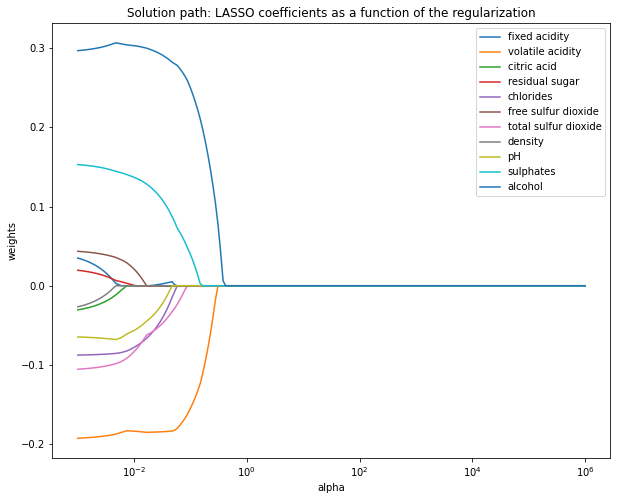

In [22]:
# Compute paths
n_alphas = 200
alphas = np.logspace(-3, 6, n_alphas)
coefs = []
for alpha in alphas:
    ridge = Lasso(alpha=alpha, fit_intercept=True)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results
fig = plt.figure(figsize=(10,8))
ax = plt.gca()
lineObject=ax.plot(alphas, coefs)
plt.legend(iter(lineObject), featureName)

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Solution path: LASSO coefficients as a function of the regularization')

plt.show()
